## Why Programming?
Why to learn a programming language is a question that only you can answer. 

I do not believe, as some seem to, that everyone needs to know how to program. One (philosophical) argument for why everyone should learn to program is that so many of our interactions in the world are mediated by computers that we ought to know something about how that works. The idea here is that there is some danger inhering in the use of machines without knowing at least something about how they work. (On the other hand, I cannot fix my own car.) We live in a world of code, maybe we ought to know something about the process of making this world. That is one argument. Other arguments are economic; if the world runs on code, then people who cannot make code are at a disadvantage. This is a debate that is worth having, but not here.

## Programming is Useful
For scientists and other types of researchers who work with data, the case for coding is much simpler: **it is useful**.

Programs in computers collect and organize your data, process your data, analyze your data, create your figures, create your documents, build and show your presentations, and so on. Learing to write computer code allows you to automate some or all of the parts of this chain of processes. Programming makes working with complicated data easier for humans. As a side-benefit, it increaes transparency and correctness of analysis.

> A student we worked with some years ago had to analyze the data from a dozen human subjects where each subject generated about a dozen files; 144 files in total. Each of these files had to have a name on the computer's hard disk, each had to be opened and read into memory, each had to have a complex mathematical model fitted to it, and each had to have their results written to the computer's hard disk. The student was given a small amount of code, in a program file, to do the analysis of one data file. They proceeded to copy the program file 144 times, and edit each of these copies to make a new program that could analyze just the one data file it had been specialized to process. Each of these analyses had to have its results saved on the computer, and, with help, the student was given a program to combine the results for each subject. This program they copied 12 times, one for each subject, and ran each program by hand to produce a single computer file for each subject. These 12 files they _manually_ copied and pasted together into Excel to make a final spreadsheet file where for each subject and each file there was one line of data. Through extensive manual editing of the spreadsheet, which they had to redo each time errors were found and the data processing changed during the experimental development, they generated the approximately 24 numbers that represented the results of interest for each subject (2 numbers per subject). The total amount of time expended on this analysis was greater than 40 hours (or one full work week), that includes the editing of all 156 program files, fixing the files when they failed to edit them correctly, the manual running of all of these separate files, the gathering and moving of data and results on disk, the manual assembly of the spreadsheet, and the complex manual coding of the spreadsheet calculations.

Perhaps worse, when they were done neither they nor we could be sure the work had been done correctly as this one-time assemblage of hand-coded programs was too large to be audited by other members of the research team.

## What We Are Covering Today
Today we will be working with several higher level constructs in R that allow programs to do more complex tasks than the simple analyses and displays that beginners usually focus on. We are really focusing on R as a **programming language** today, and much less on its statistical features.

The programming constructs we are going to look at today allow R programs:

1. To process (or make) many items (data sets, files, models, figures, documents, etc.) by **repeating sequences of instructions many times**
1. To **make decisions** about how to proceed given different values of variables
1. To **encapsulate complex processes for reuse**, such as turning complete analyses into new R functions that might be applied to many different data sets

If you are a more advanced user of R, or have more experience with real world data analyses, you will likely see immediately why these ideas are useful. If you are very close to the beginning of your use of R, this may not become really relevant to you until later on.

> At around the time of the student mentioned above, another student began working with similar data, but they realized that it was worth some time up front to learn how to get the computer to do more of the work. They used about 8 hours of time sitting and reading instructions online about (1) how to use R's **loops** to repeat calculations; and (2) using R's **functions** to encapsulate their analyses in such a way to reuse them across subjects by building into the functions values that change by subject automatically. Over the course of the 8 hours they developed two programs (a script and a function) to do the analyses and a third (also a function) to carry out the final analysis, that is, what the previous student did in their spreadsheet. Their first program (a master script) automatically used the other two programs by itself, so a complete data analysis consisted of simply running the first program. Benefits, other than the obvious ones of time saved, included (1) auditability, the program was relatively short and simple enough that everyone working on the project could review it for correctness; and (2) partial analysis, the program automatically determined how many subjects and how much data were present and adjusted itself accordingly, allowing the student to essentially reanalyze their data as they proceeded.

Our goal today is to turn you from a potential [_Goofus_](https://en.wikipedia.org/wiki/Goofus_and_Gallant) and into, at least, a nascent [_Gallant_](https://en.wikipedia.org/wiki/Goofus_and_Gallant). (We will set aside the fact that on occasion Goofus was more fun.)

## Programming in R is not New
R is a computer language for doing data analysis. 

As such, **every** analysis is a program, of some sort. Every analysis.

For instance, the following is how you do a simple linear regression and make a basic plot for some built-in data (comments explaining what the lines do follow the hashtags in green):

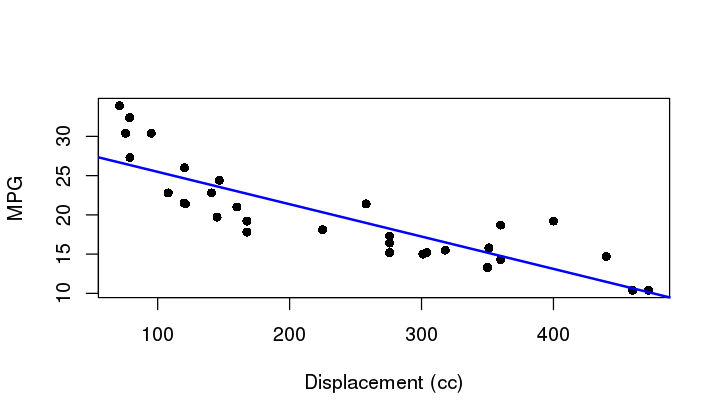

In [1]:
data(mtcars)                                          # Load the data set
mod <- lm(mpg ~ disp, data = mtcars)                  # Fit the model
options(repr.plot.width = 6, repr.plot.height = 3.5)  # Set the figure size (optional!)

plot(mtcars$disp, mtcars$mpg, pch = 16, xlab = "Displacement (cc)", ylab = "MPG")

abline(mod, lwd = 2, col = "blue")                    # Add the regression line to the plot

The five lines of R code above constitute a **program** although most people do not think of it as such. But a program is just a list of instructions, given **in order**, that tells the machine what to do. So this is, in fact, a program; even if it is a very simple one that will likely never be used again when you finish with it.

## Brief Review of R
In the next few examples, we review some basic R that we will be using. This is obviously not comprehensive nor complete in any way. Depending on your experience level you may have to take some of the following as arbitrary for the present time.

### Loading Data
We can load data from CSV files using the `read.csv` function, as shown here:

In [2]:
hw <- read.csv("height_weight_200.csv")

We can look at the data with the `head` command:

In [3]:
head(hw)

height,weight
65.78,112.99
71.52,136.49
69.40,153.03
68.22,142.34
67.79,144.30
68.70,123.30


A quick summary of the data is available from `summary` and we can get the usual statistical functions such as `mean`; `median`; standard deviation, `sd`; and variance, `var`:

In [4]:
summary(hw)

     height          weight     
 Min.   :63.43   Min.   : 97.9  
 1st Qu.:66.52   1st Qu.:119.9  
 Median :67.94   Median :127.9  
 Mean   :67.95   Mean   :127.2  
 3rd Qu.:69.20   3rd Qu.:136.1  
 Max.   :73.90   Max.   :159.0  

We can pick out columns of data from data frames by using the `$` (dollar sign) operator. The lines below pick out the `weight` variable from the `hw` data frame, and use these values to compute various statistics:

In [5]:
mean(hw$weight)

[1] 127.222

In [6]:
median(hw$weight)

[1] 127.875

In [7]:
sd(hw$weight)

[1] 11.96096

In [8]:
var(hw$weight)

[1] 143.0645

We can also do comparisons. Here we compare two numbers using the `==` operator (for "equals"):

In [9]:
sd(hw$weight) == sqrt(var(hw$weight))

[1] TRUE

Note that this will **usually not work** when you compare two floating point (AKA decimal) numbers. There is usually some round-off error that will make almost any two numbers not truly equal. We will discuss this elsewhere.

In [10]:
sqrt(var(hw$weight))

[1] 11.96096

An example: a few years ago we had two students who were working on a project which generated dozens of data files per subject. One of the students did not want to learn the topics we cover today, and ended up editing and saving (literally) 144 separate small program files, _each with a tiny variation of the same analysis, and each of which had to be edited and **run separately**_. The total time for work by this student was on the order of one full work week. The other student wrote one program that did the analysis and ended up saving about 6 variations of the file as a record of their work; each program automatically ran the analysis across all of the data files. Total work time, including learning the basic techniques to do the programs, was on the order of one full work **day**. In addition the second student now knows (1) how to automate future work, and, possibly more importantly, (2) how to organize their work for automation to make things easier in the future. Hopefully an example of dividing work time by 5 should impress on you the value of automation and the programming that produces it. But this will come down to personal choice and expectation of what your future work will entail.